<a href="https://colab.research.google.com/github/abhiaage/googlegeminioffer/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
df = pd.read_csv('/content/retail_sales_dataset.csv', encoding = 'unicode_escape')

In [5]:
df.shape

(1000, 9)

In [7]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
pd.isnull(df).sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


# **Exploratory** **Data** **Analysis**

### **Gender**

In [11]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

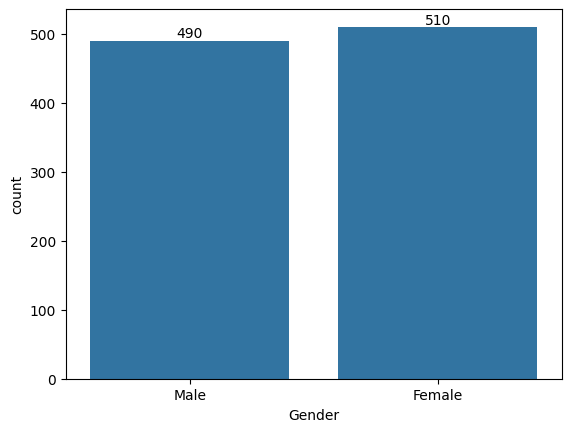

In [15]:
ax = sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [21]:
sales_gen = df.groupby(['Gender'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)

sales_gen

,Gender,Total Amount
0,Female,232840
1,Male,223160


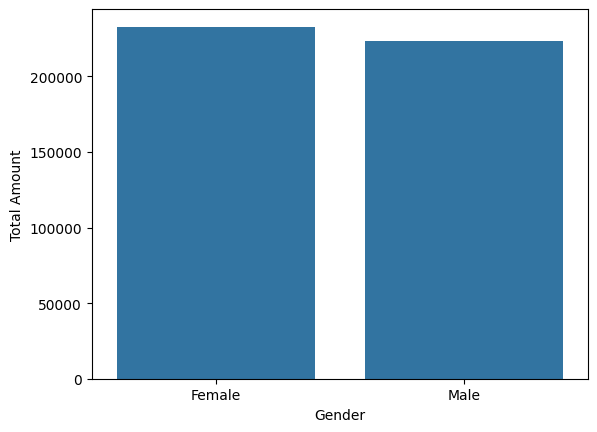

In [22]:
sns.barplot(x = 'Gender',y= 'Total Amount' ,data = sales_gen)
for bars in ax.containers:
    ax.bar_label(bars)

In [25]:
sales_gen = df.groupby(['Gender', 'Product Category'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

sales_gen

,Gender,Product Category,Quantity
4,Male,Clothing,453
1,Female,Clothing,441
2,Female,Electronics,439
0,Female,Beauty,418
5,Male,Electronics,410
3,Male,Beauty,353


<Axes: xlabel='Gender', ylabel='Quantity'>

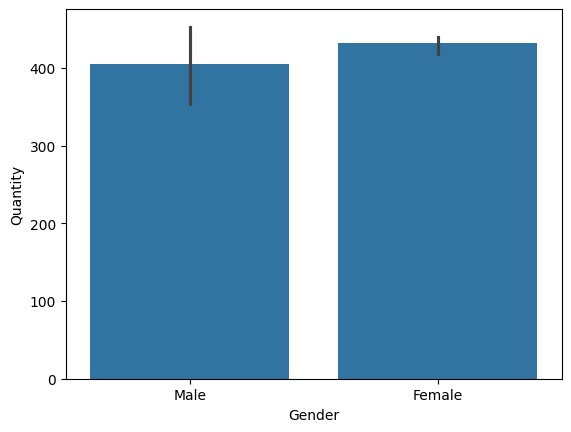

In [30]:
sns.barplot(x = 'Gender',y= 'Quantity' ,data = sales_gen)


From above graphs we can see that numbers of buyers being female is slightly more than males and also purchasing power of females is slightly more than males

## **Age**

In [34]:
bins = [13, 17, 24, 34, 44, 70, 100]
labels = ['13-17', '18-24', '25-34', '35-44', '45-70', '70+']
df['Age group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,45-70
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,25-34
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,45-70
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,45-70
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,18-24
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,35-44


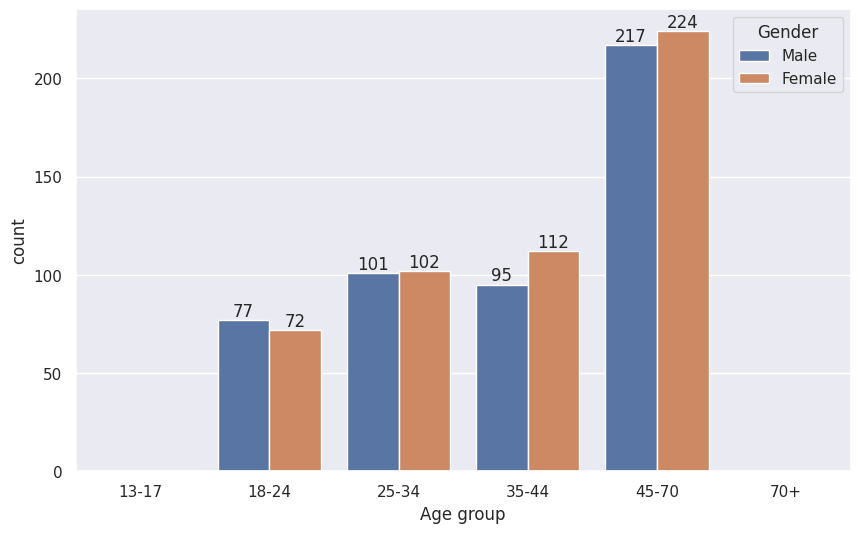

In [68]:
ax = sns.countplot(x='Age group',hue = 'Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [40]:
sales_age = df.groupby(['Age group'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)

sales_age

/tmp/ipython-input-1584633517.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_age = df.groupby(['Age group'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)


,Age group,Total Amount
4,45-70,187425
2,25-34,97090
3,35-44,96835
1,18-24,74650
0,13-17,0
5,70+,0


<Axes: xlabel='Age group', ylabel='Total Amount'>

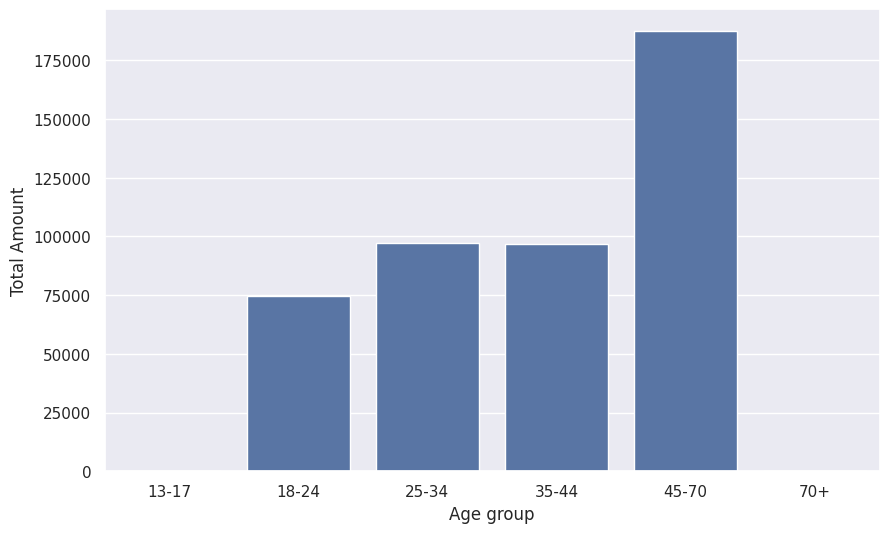

In [60]:
sns.barplot(x = 'Age group', y = 'Total Amount', data = sales_age)

From above graphs we can see that most of the buyers are from age group 45-70

## **Product** **Category**

In [42]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Age group'],
      dtype='object')

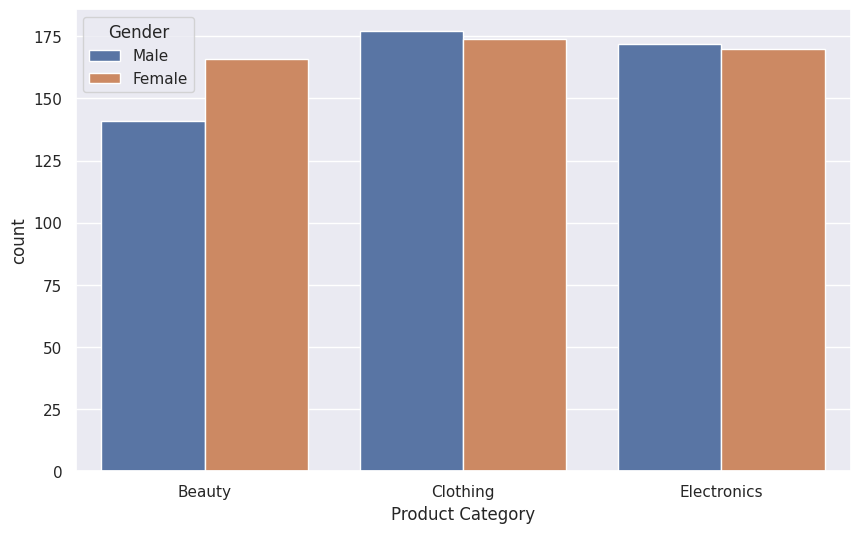

In [58]:
sns.countplot(x='Product Category', data=df, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

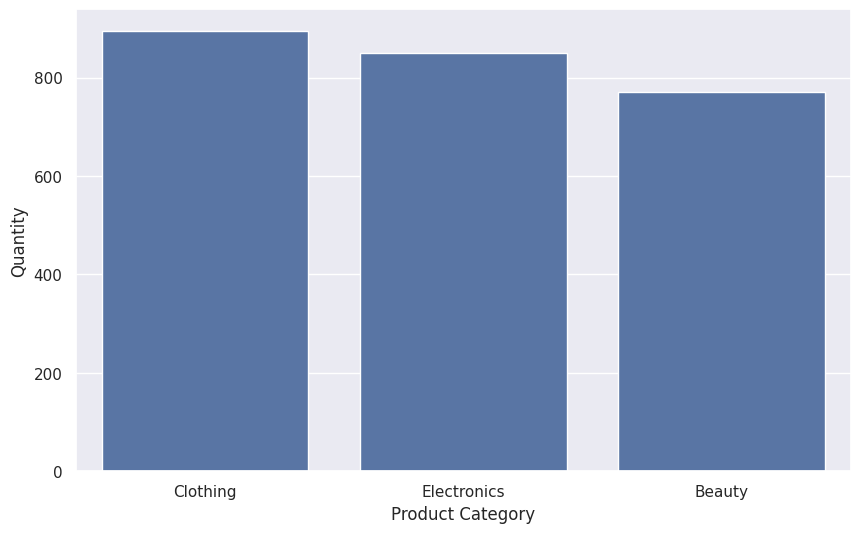

In [49]:
sns.set(rc={'figure.figsize':(10,6)})
product_category = df.groupby(['Product Category'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
sns.barplot(x = 'Product Category', y = 'Quantity', data = product_category)
for bars in ax.containers:
    ax.bar_label(bars)

In [54]:
product_category = df.groupby(['Product Category'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)
product_category

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


<Axes: xlabel='Product Category', ylabel='Total Amount'>

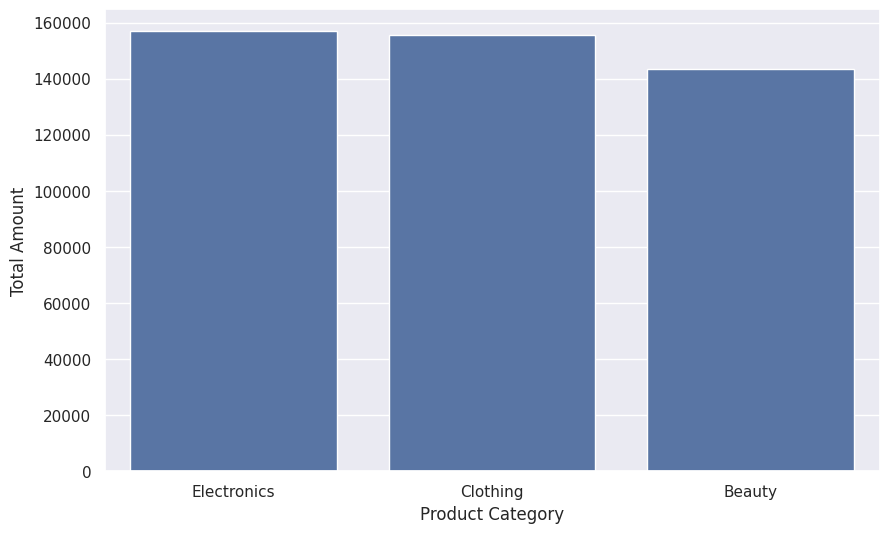

In [57]:
sns.barplot(x = product_category['Product Category'], y = product_category['Total Amount'])

from the above graphs we can see thar most sold product categories are clothing and electronis. beauty is least sold category which have more female buyers.

## **Conclusion**:

Both males and females from age group 45-70 are more likely to buy products from clothing and electronicd category. females are more likey to buy beauty products than male.

**Thank** **you**!